# DBScan
Density Based Clusting Algorithm (Unsupervised) --> Clustering
- D: Density
- B: Based 

Key Params:
- Eps: Epsilon ( disitance to the neigborhood)
- Min_Sample: Count of minimum samples to count the group as a cluster

by DBSCAN -> if outlier (noise) --> The cluster will be (-1)


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

import seaborn as sn

# Load The data

In [2]:
df = pd.read_csv("./datasets/data.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plot the data

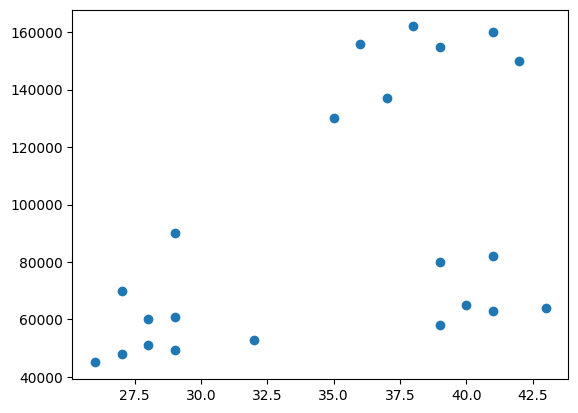

In [3]:
plt.scatter(df["Age"], df["Income"])

# Scale the data (Normalization)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])


df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


# Build and Train the model

In [15]:

model = DBSCAN(eps = 0.2, min_samples= 3)

y_predicted = model.fit_predict(df[["Age", "Income"]])

# Attach the predicted clusted into the main df
df["cluster"] = y_predicted


In [16]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,-1
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


# Plot the clusters

<AxesSubplot: xlabel='Age', ylabel='Income'>

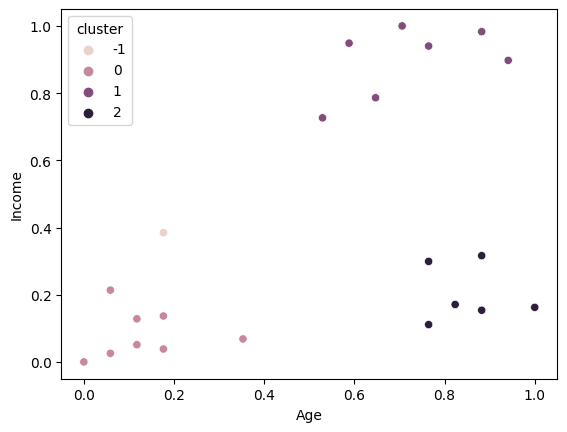

In [17]:
sn.scatterplot(x = df["Age"], y = df["Income"], hue= df["cluster"])